# Name: Paavani Ramakrishna
# Git Username: paavani2000
# USC id: 7696462483

# 1.Tree-Based Methods

(a) Download the APS Failure data from:https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks. The dataset contains a training set and a test set. The training set contains 60,000 rows, of which 1,000 belong to the positive class and 171 columns, of which one is the class column. All attributes are nu-meric.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
train_data =pd.read_csv('../Data/aps_failure_training_set.csv', skiprows=20, na_values="na")
test_data =pd.read_csv('../Data/aps_failure_test_set.csv', skiprows=20, na_values="na")
train_data

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [4]:
test_data

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,NaN,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636,NaN,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,neg,110,NaN,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


# (b) Data Preparation

This dataset has missing values. When the amount of data with missing values is significant, discarding them may not be a good option.

i. Research common techniques for handling missing values in datasets.
Pick at least one technique and apply it to this dataset in the next steps

In [5]:
print("Number of missing values in training set before imputation:", train_data.isnull().sum())
print("Total missing values in training set:",train_data.isnull().sum().sum())

Number of missing values in training set before imputation: class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64
Total missing values in training set: 850015


In [6]:
print("Number of missing values in test set before imputation:", test_data.isnull().sum())
print("Total missing values in test set:",test_data.isnull().sum().sum())

Number of missing values in test set before imputation: class         0
aa_000        0
ab_000    12363
ac_000      926
ad_000     3981
          ...  
ee_007      192
ee_008      192
ee_009      192
ef_000      762
eg_000      762
Length: 171, dtype: int64
Total missing values in test set: 228680


In [7]:
# Impute missing values with the median of each column
for col in train_data.columns[1:]:
    train_data[col].fillna(train_data[col].mean(), inplace=True)
for col in test_data.columns[1:]:
    test_data[col].fillna(test_data[col].mean(), inplace=True)

In [8]:
print("Training set shape after imputation:", train_data.shape)
print("Test set shape after imputation:", test_data.shape)
print("Number of missing values in training set after imputation:", train_data.isnull().sum().sum())
print("Number of missing values in test set after imputation:", test_data.isnull().sum().sum())


Training set shape after imputation: (60000, 171)
Test set shape after imputation: (16000, 171)
Number of missing values in training set after imputation: 0
Number of missing values in test set after imputation: 0


   - **ii.** For each of the 170 features, calculate the **coefficient of variation (CV)** as follows:
     \[
     CV = \frac{s}{m}
     \]
     where \( s \) is the sample standard deviation, and \( m \) is the sample mean.

In [9]:
cv_values = {}
for col in train_data.columns[1:]:
    std_dev = train_data[col].std()
    mean_val = train_data[col].mean()
    if mean_val != 0:
        cv = std_dev / mean_val
        cv_values[col] = cv
    else:
        cv_values[col] = np.nan
        
for feature, cv in cv_values.items():
    print(f"CV for {feature}: {cv}")


CV for aa_000: 2.450937577943998
CV for ab_000: 2.3283999870318435
CV for ac_000: 2.169766523276966
CV for ad_000: 183.84762036900082
CV for ae_000: 23.190936665578853
CV for af_000: 18.658921096017636
CV for ag_000: 91.87856462936738
CV for ag_001: 34.854950077721575
CV for ag_002: 17.369143404889634
CV for ag_003: 8.550049026704684
CV for ag_004: 5.401478695421808
CV for ag_005: 2.9270920824257813
CV for ag_006: 2.3449270703375973
CV for ag_007: 2.8334840909357935
CV for ag_008: 6.1545830785515525
CV for ag_009: 32.98435104133622
CV for ah_000: 2.3001872486143227
CV for ai_000: 18.01268174446153
CV for aj_000: 43.80182238271878
CV for ak_000: 74.5266879586007
CV for al_000: 9.074370822656968
CV for am_0: 9.058671606113235
CV for an_000: 2.2387967743803063
CV for ao_000: 2.260149116812668
CV for ap_000: 3.059164306638844
CV for aq_000: 2.839611693365452
CV for ar_000: 10.837049702204823
CV for as_000: 86.41690384051536
CV for at_000: 23.4594247908152
CV for au_000: 68.1605540126918
CV

In [10]:
sorted_cv = sorted(cv_values.items(), key=lambda item: item[1], reverse=True)

for feature, cv in sorted_cv:
    print(f"CV for {feature}: {cv}")

CV for cs_009: 235.27760461029902
CV for cf_000: 184.23309219117692
CV for co_000: 183.94901745596403
CV for ad_000: 183.84762036900082
CV for dh_000: 114.98499085012163
CV for dj_000: 109.6472849388733
CV for ag_000: 91.87856462936738
CV for as_000: 86.41690384051536
CV for ay_009: 83.78606300858695
CV for az_009: 76.96797806358856
CV for ak_000: 74.5266879586007
CV for au_000: 68.1605540126918
CV for ch_000: 58.268228662292024
CV for ay_001: 52.23385176360165
CV for dz_000: 49.00215810098666
CV for df_000: 48.79901491451668
CV for cs_008: 47.68230960735955
CV for ef_000: 47.124953091672005
CV for aj_000: 43.80182238271878
CV for eg_000: 40.55324999114492
CV for ay_002: 38.809580401918666
CV for dl_000: 37.08367624939188
CV for ay_000: 37.009562327062504
CV for dg_000: 35.914418426339644
CV for ag_001: 34.854950077721575
CV for dk_000: 34.564625419181496
CV for cn_009: 33.88067479556715
CV for dm_000: 33.83761582350898
CV for ay_004: 33.37471600468463
CV for ea_000: 33.35988009366405


iii. Plot a correlation matrix for the features using pandas or any suitable tool.

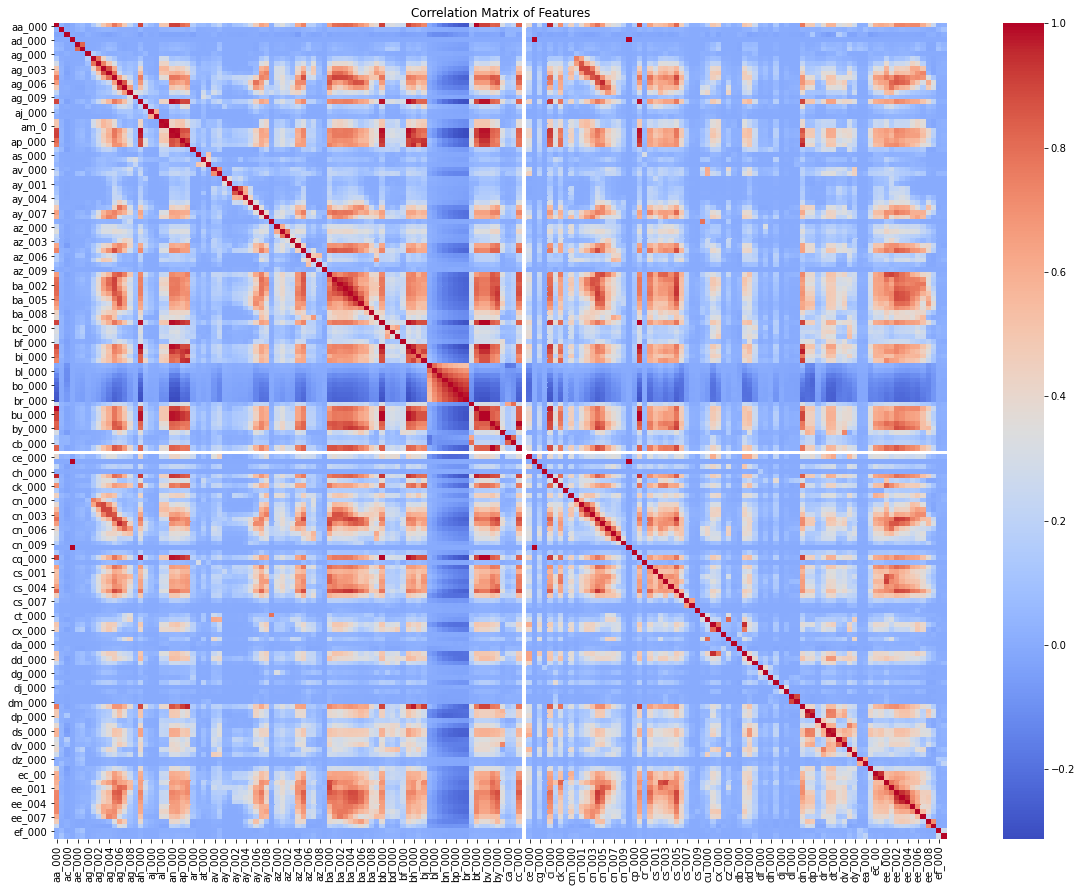

In [11]:

X_train = train_data.drop("class", axis=1)

correlation_matrix = X_train.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, cmap="coolwarm")
plt.title("Correlation Matrix of Features")
plt.show()

iv. Select (\lfloor \sqrt{170} \rfloor) features with the highest CV. Create scatter plots and box plots for these features, similar to those shown on p. 129 of Introduction to Statistical Learning (ISLR).
Consider whether these plots suggest the significance of the chosen features. Note that selecting these features is only for visualization purposes; you are not restricted to using only these features in the following steps.

In [12]:
num_features_to_select = math.floor(np.sqrt(170))
top_cv_features = [feature for feature, cv in sorted_cv[:num_features_to_select]]

In [13]:
print("\nTop CV Features:")
print(top_cv_features)


Top CV Features:
['cs_009', 'cf_000', 'co_000', 'ad_000', 'dh_000', 'dj_000', 'ag_000', 'as_000', 'ay_009', 'az_009', 'ak_000', 'au_000', 'ch_000']


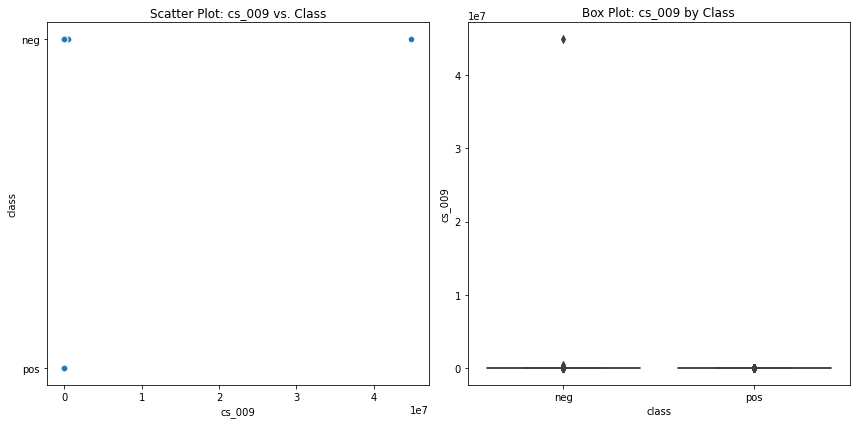

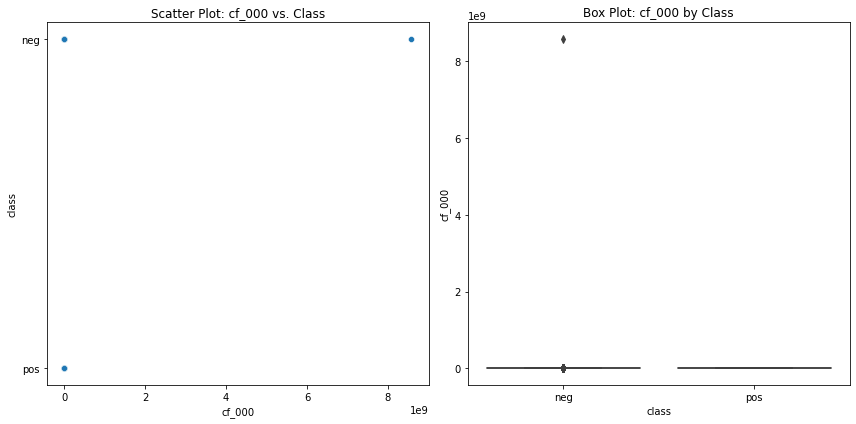

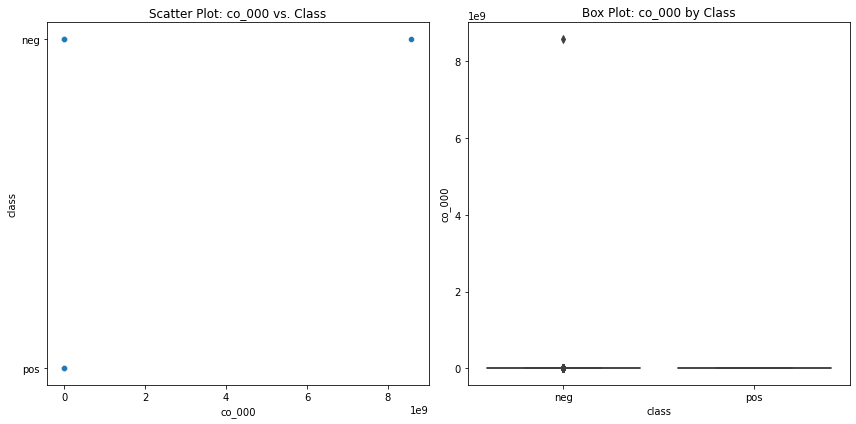

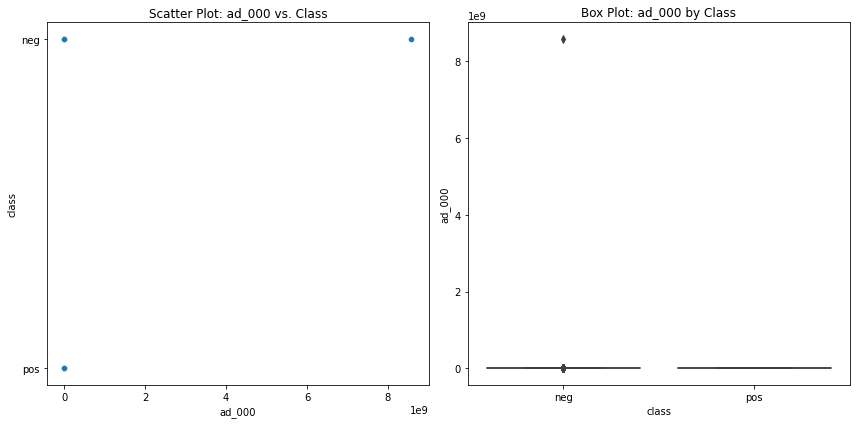

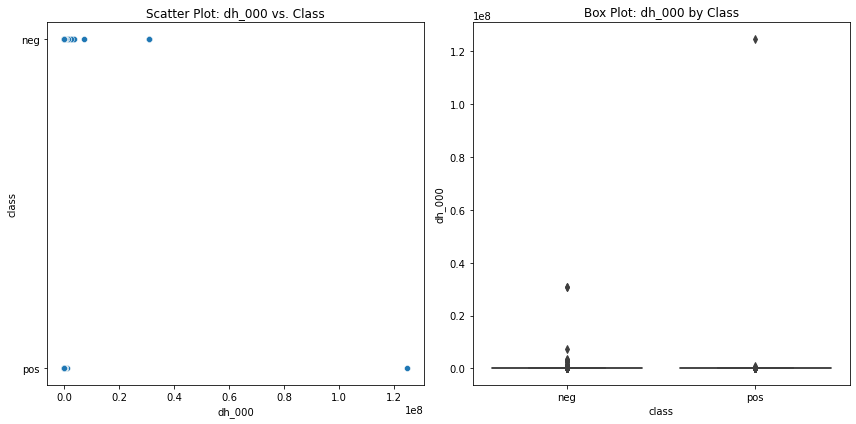

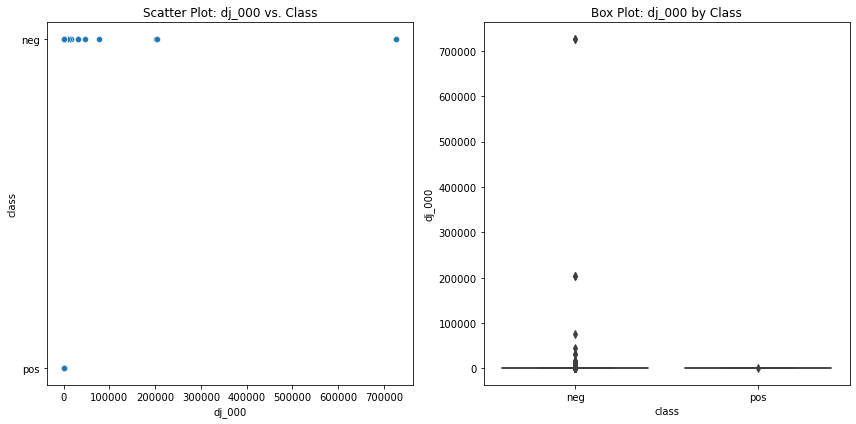

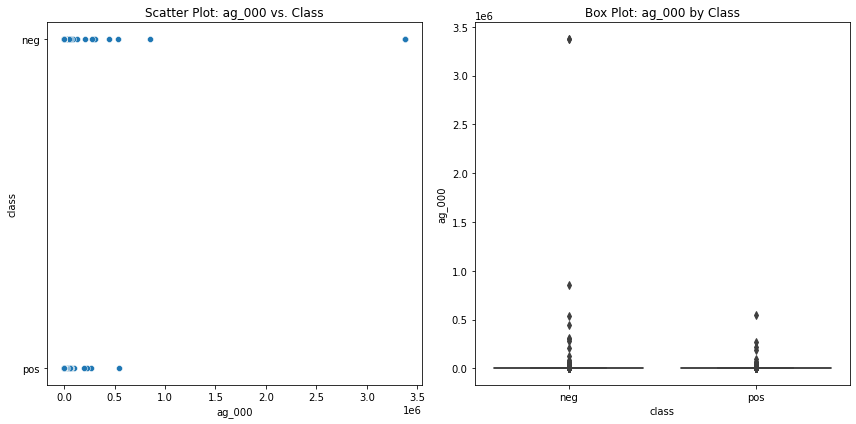

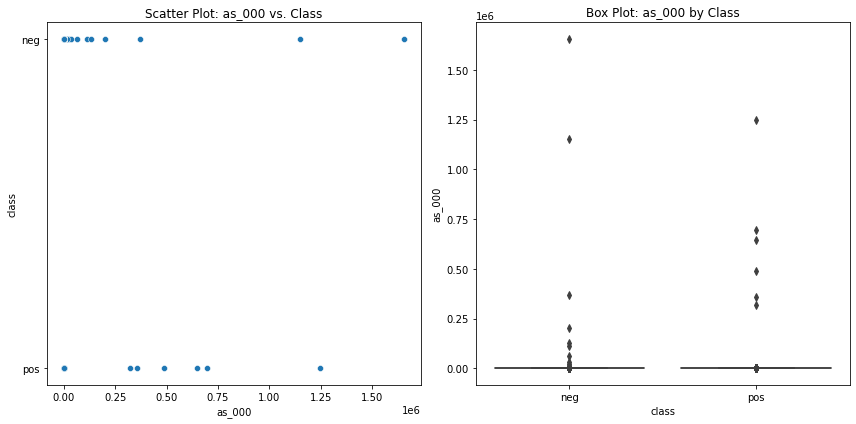

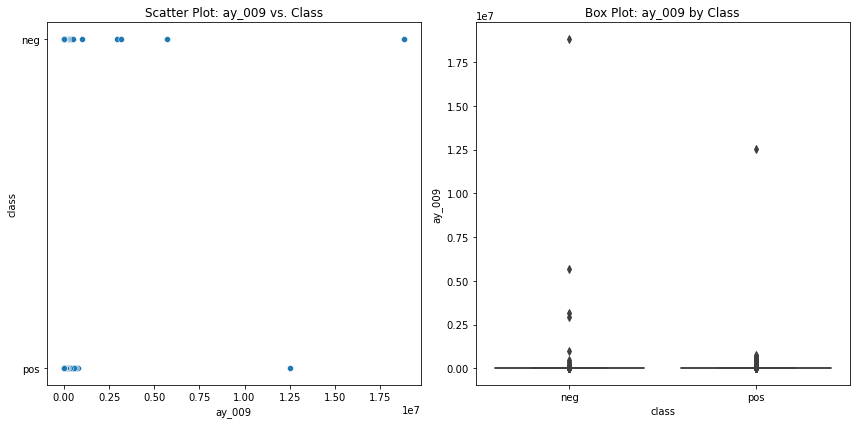

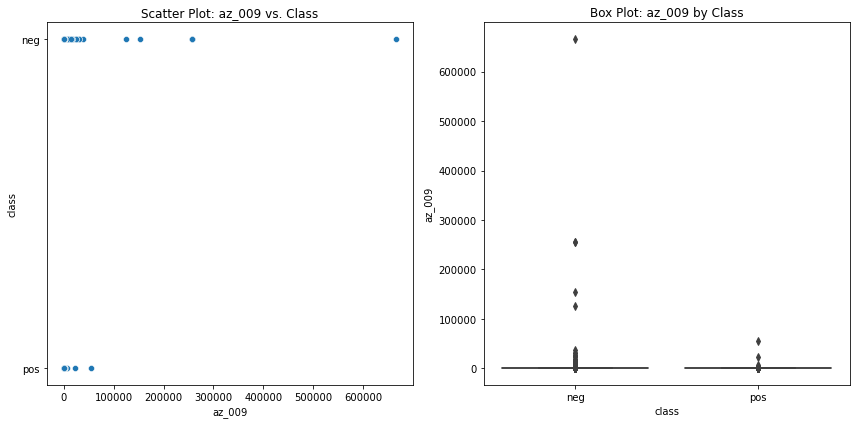

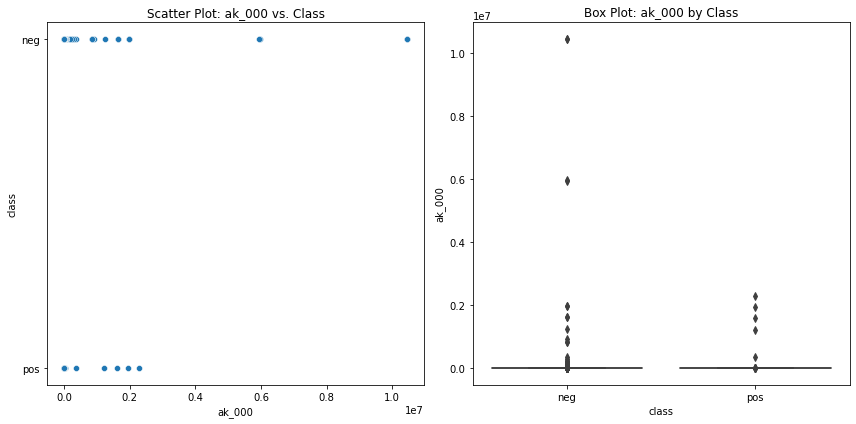

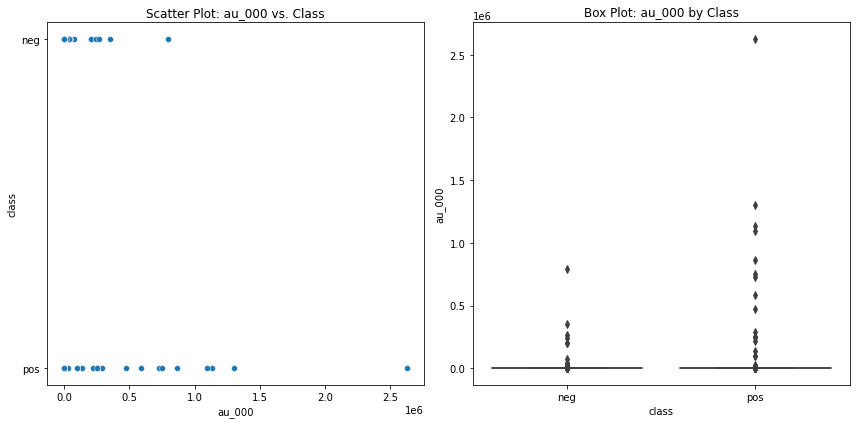

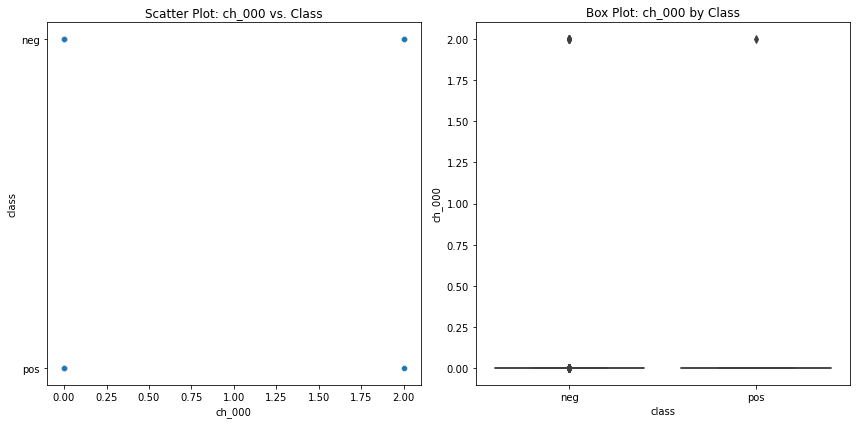

In [14]:
for feature in top_cv_features:
    plt.figure(figsize=(12, 6))

    # Scatter plot
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=feature, y="class", data=train_data)
    plt.title(f"Scatter Plot: {feature} vs. Class")

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x="class", y=feature, data=train_data)
    plt.title(f"Box Plot: {feature} by Class")

    plt.tight_layout()
    plt.show()

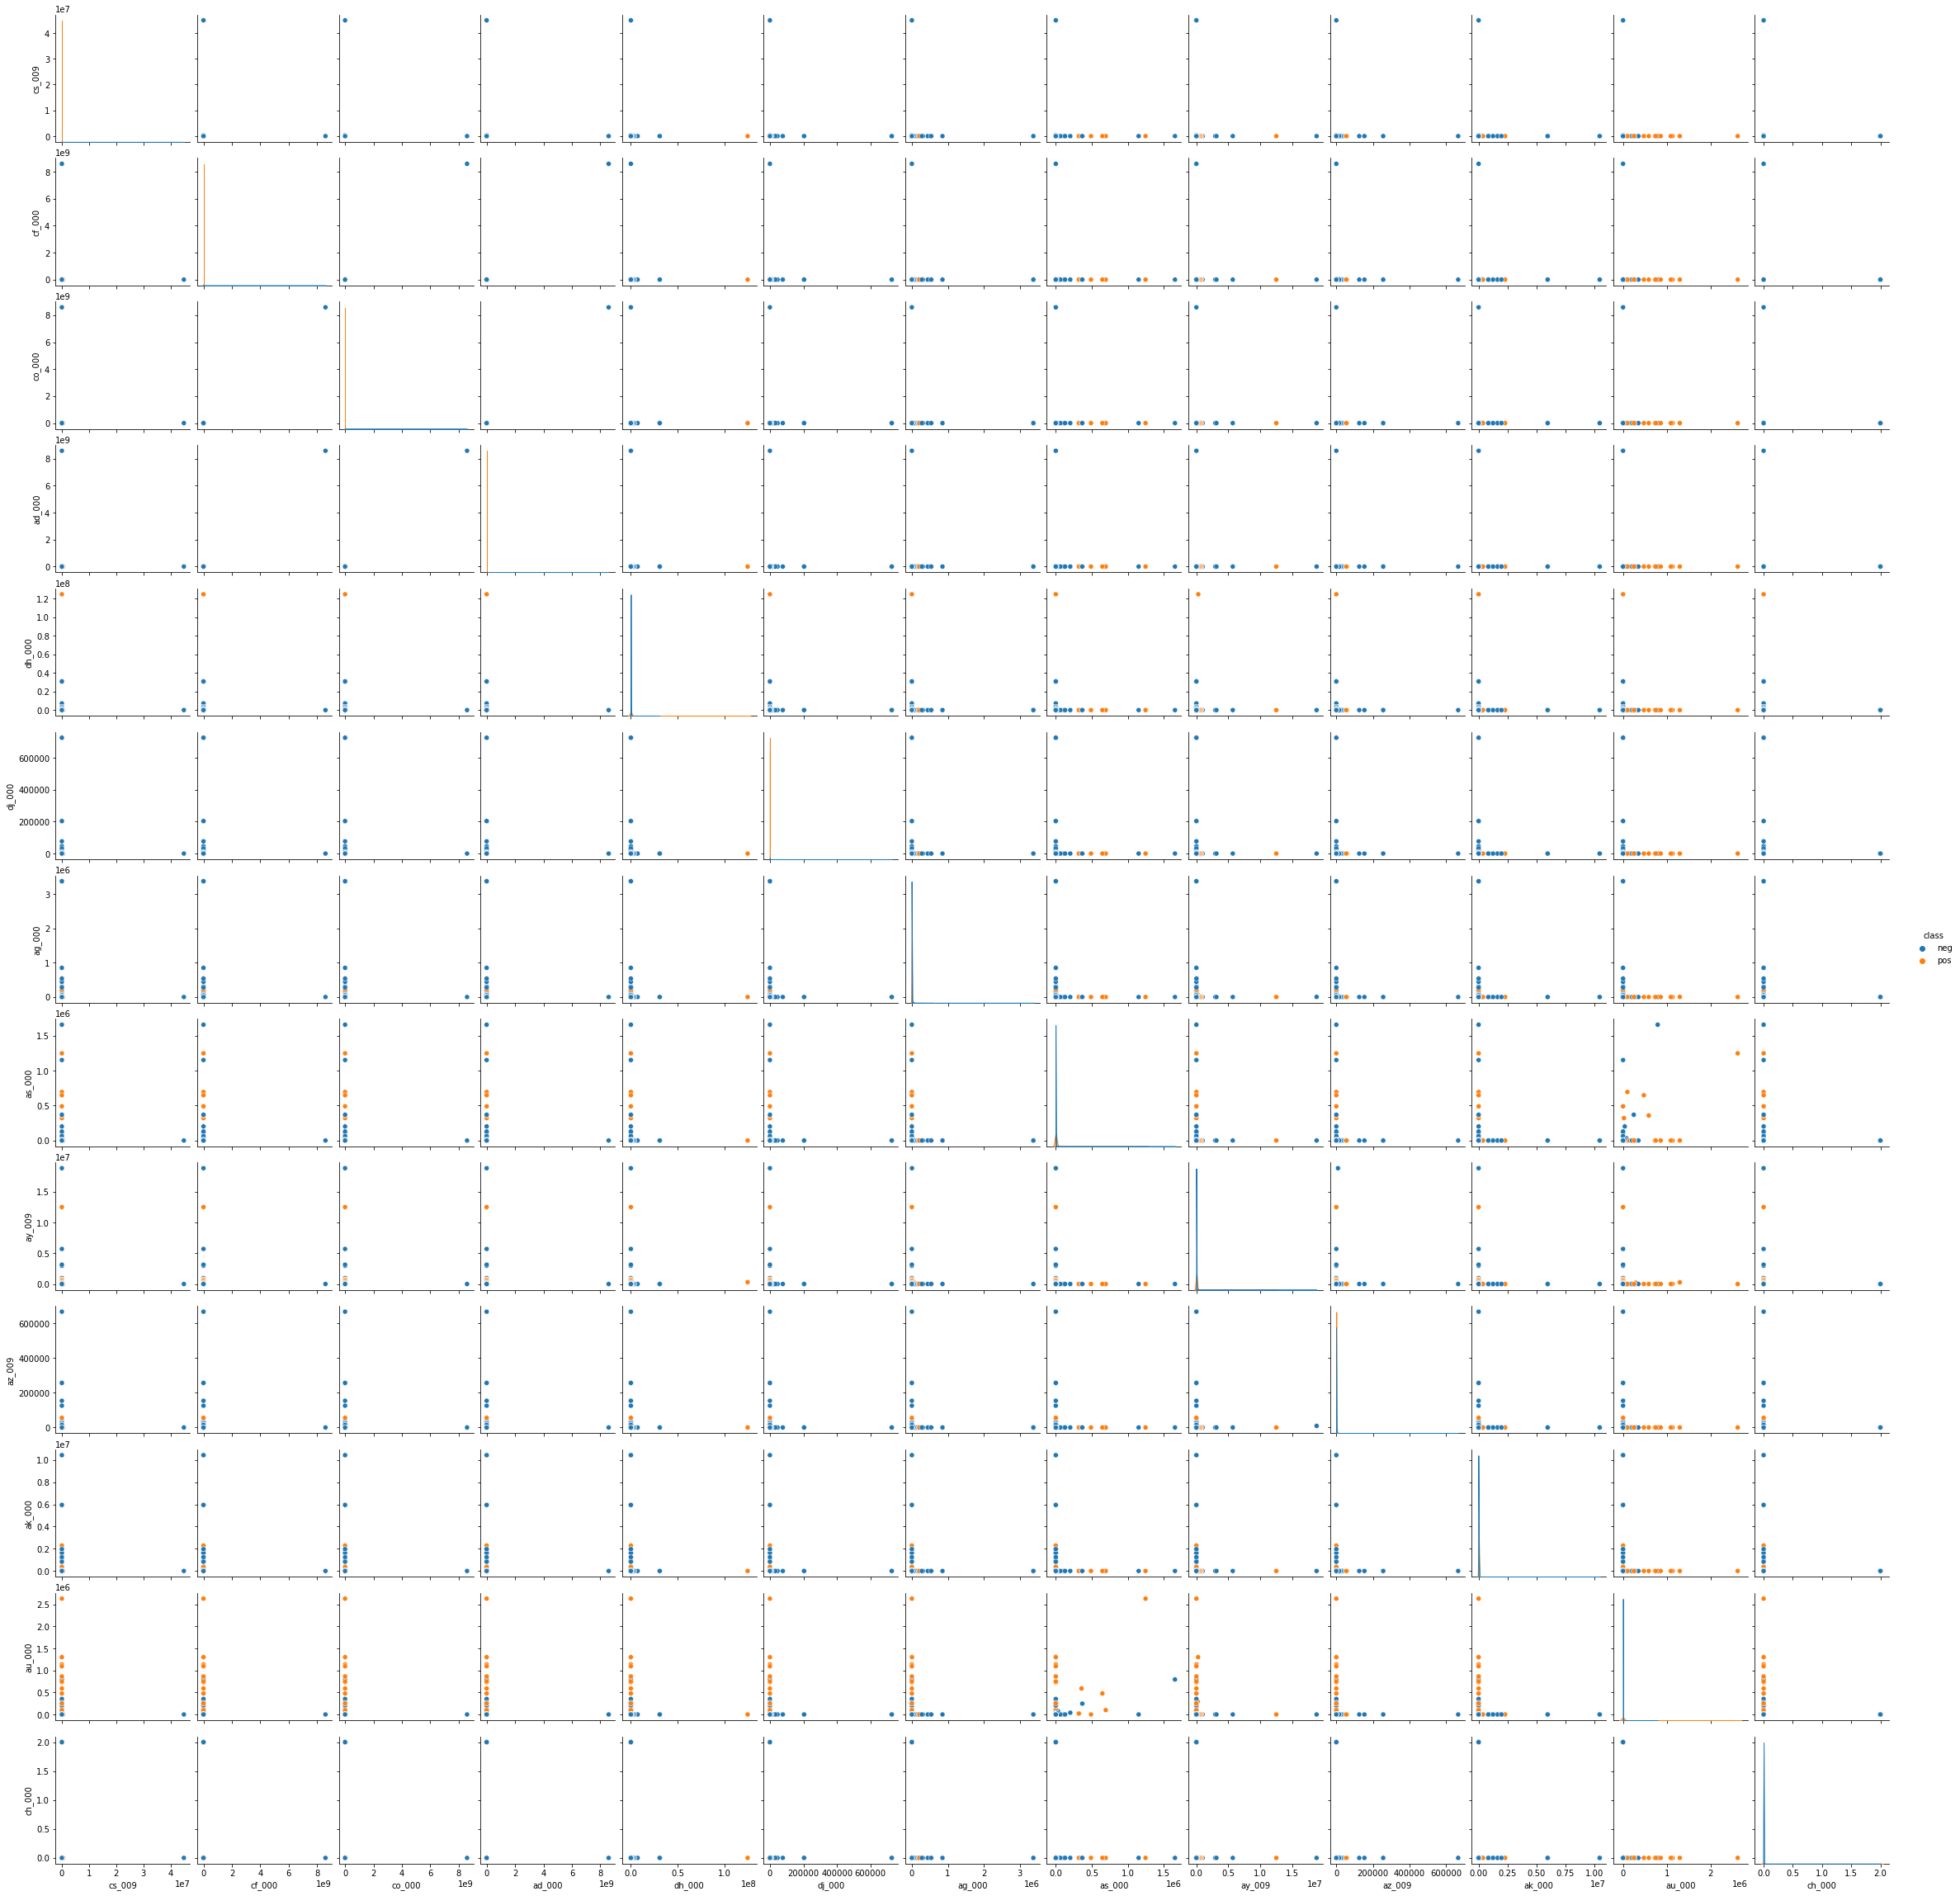

In [15]:
for col in train_data.columns[1:]:
    train_data[col] = pd.to_numeric(train_data[col], errors='coerce')
    train_data[col].fillna(train_data[col].median(), inplace=True)

# Calculate CV for each feature
cv_values = {}
for col in train_data.columns[1:]:
    std_dev = train_data[col].std()
    mean_val = train_data[col].mean()
    if mean_val != 0:
        cv = std_dev / mean_val
        cv_values[col] = cv
    else:
        cv_values[col] = np.nan

# Sort CV values in descending order
sorted_cv = sorted(cv_values.items(), key=lambda item: item[1], reverse=True)

# Select top sqrt(170) features
num_features_to_select = math.floor(np.sqrt(170))
top_cv_features = [feature for feature, cv in sorted_cv[:num_features_to_select]]

# Create pairplot for selected features
sns.pairplot(train_data[top_cv_features + ["class"]], hue="class")
plt.show()

v.Determine the number of positive and negative samples. Is this dataset imbalanced?

In [16]:
class_counts = train_data["class"].value_counts()

print("Class Distribution:")
print(class_counts)

Class Distribution:
neg    59000
pos     1000
Name: class, dtype: int64


In [17]:
if class_counts.min() / class_counts.max() < 0.1:  # Common threshold for imbalance
    print("\nThis dataset is imbalanced.")
else:
    print("\nThis dataset is not significantly imbalanced.")


This dataset is imbalanced.


c. Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forset and compare it to the test error.

Training Confusion Matrix:
 [[59000     0]
 [    1   999]]
Test Confusion Matrix:
 [[15605    20]
 [  101   274]]


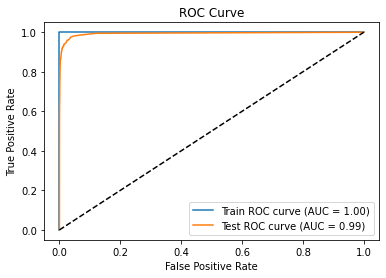

Training Misclassification: 0.0000
Test Misclassification: 0.0076
Out of Bag Error: 0.0060

Comparison of OOB and Test error:
OOB error: 0.0060
Test error: 0.0076
OOB and test error are relatively close.


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Assuming train_data and test_data are loaded and missing values are imputed

# Impute missing values with the median of each column
for col in train_data.columns[1:]:
    train_data[col] = pd.to_numeric(train_data[col], errors='coerce')
    train_data[col].fillna(train_data[col].median(), inplace=True)
for col in test_data.columns[1:]:
    test_data[col] = pd.to_numeric(test_data[col], errors='coerce')
    test_data[col].fillna(test_data[col].median(), inplace=True)

# Prepare the data
X_train = train_data.drop("class", axis=1)
y_train = train_data["class"].apply(lambda x: 1 if x == "pos" else 0)

X_test = test_data.drop("class", axis=1)
y_test = test_data["class"].apply(lambda x: 1 if x == "pos" else 0)

# Train Random Forest
rf = RandomForestClassifier(random_state=42, oob_score=True) #enable oob score calculation.
rf.fit(X_train, y_train)

# Predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
y_train_prob = rf.predict_proba(X_train)[:, 1]
y_test_prob = rf.predict_proba(X_test)[:, 1]

# Confusion Matrix
print("Training Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

# ROC and AUC
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure()
plt.plot(fpr_train, tpr_train, label=f"Train ROC curve (AUC = {roc_auc_train:.2f})")
plt.plot(fpr_test, tpr_test, label=f"Test ROC curve (AUC = {roc_auc_test:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Misclassification
train_misclassification = 1 - accuracy_score(y_train, y_train_pred)
test_misclassification = 1 - accuracy_score(y_test, y_test_pred)

print(f"Training Misclassification: {train_misclassification:.4f}")
print(f"Test Misclassification: {test_misclassification:.4f}")

# Out of Bag Error
print(f"Out of Bag Error: {1 - rf.oob_score_:.4f}")

#Compare OOB and Test error.
print("\nComparison of OOB and Test error:")
print(f"OOB error: {1-rf.oob_score_:.4f}")
print(f"Test error: {test_misclassification:.4f}")

if abs((1 - rf.oob_score_) - test_misclassification) < 0.05: #arbitrary threshold.
  print("OOB and test error are relatively close.")
else:
  print("OOB and test error differ significantly.")

d. Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 1c. Compare the results with those of 1c.

In [23]:
rf_balanced = RandomForestClassifier(random_state=42, class_weight="balanced", oob_score=True)
rf_balanced.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', oob_score=True, random_state=42)

In [24]:
y_train_pred_balanced = rf_balanced.predict(X_train)
y_test_pred_balanced = rf_balanced.predict(X_test)
y_train_prob_balanced = rf_balanced.predict_proba(X_train)[:, 1]
y_test_prob_balanced = rf_balanced.predict_proba(X_test)[:, 1]

In [25]:
print("Balanced Training Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_balanced))
print("Balanced Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_balanced))

Balanced Training Confusion Matrix:
 [[59000     0]
 [    1   999]]
Balanced Test Confusion Matrix:
 [[15612    13]
 [  171   204]]


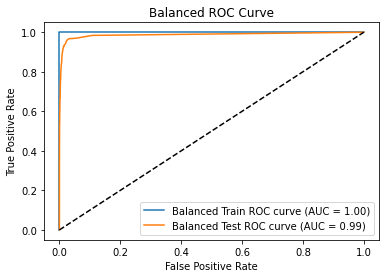

In [26]:
# ROC and AUC
fpr_train_balanced, tpr_train_balanced, _ = roc_curve(y_train, y_train_prob_balanced)
roc_auc_train_balanced = auc(fpr_train_balanced, tpr_train_balanced)
fpr_test_balanced, tpr_test_balanced, _ = roc_curve(y_test, y_test_prob_balanced)
roc_auc_test_balanced = auc(fpr_test_balanced, tpr_test_balanced)

plt.figure()
plt.plot(fpr_train_balanced, tpr_train_balanced, label=f"Balanced Train ROC curve (AUC = {roc_auc_train_balanced:.2f})")
plt.plot(fpr_test_balanced, tpr_test_balanced, label=f"Balanced Test ROC curve (AUC = {roc_auc_test_balanced:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Balanced ROC Curve")
plt.legend()
plt.show()

In [27]:
# Misclassification
train_misclassification_balanced = 1 - accuracy_score(y_train, y_train_pred_balanced)
test_misclassification_balanced = 1 - accuracy_score(y_test, y_test_pred_balanced)

print(f"Balanced Training Misclassification: {train_misclassification_balanced:.4f}")
print(f"Balanced Test Misclassification: {test_misclassification_balanced:.4f}")

Balanced Training Misclassification: 0.0000
Balanced Test Misclassification: 0.0115


In [28]:
# Out of Bag Error
print(f"Balanced Out of Bag Error: {1 - rf_balanced.oob_score_:.4f}")

Balanced Out of Bag Error: 0.0077


In [31]:
# Comparison with the previous results
print("\nComparison with Unbalanced vs. Balanced Random Forest:")
print(f"{'Metric':<30} {'Unbalanced':<15} {'Balanced':<15}")
print(f"{'Training Misclassification:':<30} {train_misclassification:.4f}  {train_misclassification_balanced:.4f}")
print(f"{'Test Misclassification:':<30} {test_misclassification:.4f}  {test_misclassification_balanced:.4f}")
print(f"{'Training AUC:':<30} {roc_auc_train:.4f}  {roc_auc_train_balanced:.4f}")
print(f"{'Test AUC:':<30} {roc_auc_test:.4f}  {roc_auc_test_balanced:.4f}")
print(f"{'OOB Error:':<30} {1-rf.oob_score_:.4f}  {1-rf_balanced.oob_score_:.4f}")

if test_misclassification_balanced < test_misclassification:
  print("\nBalanced Random Forest decreased misclassification error on the test set.")
elif test_misclassification_balanced > test_misclassification:
  print("\nBalanced Random Forest increased misclassification error on the test set.")
else:
  print("\nBalanced Random Forest had the same misclassification error on the test set.")

if roc_auc_test_balanced > roc_auc_test:
  print("Balanced Random Forest increased AUC on the test set.")
elif roc_auc_test_balanced < roc_auc_test:
  print("Balanced Random Forest decreased AUC on the test set.")
else:
  print("Balanced Random Forest had the same AUC on the test set.")


Comparison with Unbalanced vs. Balanced Random Forest:
Metric                         Unbalanced      Balanced       
Training Misclassification:    0.0000  0.0000
Test Misclassification:        0.0076  0.0115
Training AUC:                  1.0000  1.0000
Test AUC:                      0.9937  0.9873
OOB Error:                     0.0060  0.0077

Balanced Random Forest increased misclassification error on the test set.
Balanced Random Forest decreased AUC on the test set.


(e) XGBoost and Model Trees In the case of a univariate tree, only one input dimension is used at a tree split. In a multivariate tree, or model tree, at a decision node all input dimensions can be used and thus it is more general. In univariate classification trees, majoritypolling is used at each node to determine the split of that node as the decisionrule. In model trees, a (linear) model that relies on all of the variables is usedto determine the split of that node (i.e. instead of usingXj> sas the decisionrule, one hasPjβjXj> s. as the decision rule). Alternatively, in a regressiontree, instead of using average in the region associated with each node, a linearregression model is used to determine the value associated with that node.One of the methods that can be used at each node is Logistic Regression. Becausethe number of variables is large in this problem, one can useL1-penalized logisticregression at each node. You can use XGBoost to fit the model tree. Determineα(the regularization term) using cross-validation. Train the model for the APSdata set without compensation for class imbalance. Use one of 5 fold, 10 fold,and leave-one-out cross validation methods to estimate the error of your trainedmodel and compare it with the test error. Report the Confusion Matrix, ROC,and AUC for training and test sets.

In [32]:
pip install xgboost

In [36]:
model = xgb.XGBClassifier(
    objective='binary:logistic',
    tree_method='hist', # or 'gpu_hist' if you have GPU
    enable_categorical=True, #if you have categorical variables
    eval_metric='logloss'
)

# Cross-validation for alpha (L1 regularization)
param_grid = {
    'reg_alpha': [0, 0.1, 0.5, 1, 5, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=True,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'reg_alpha': [0, 0.1, 0.5, 1, 5, 10]},
             scoring='roc_auc')

In [37]:
best_alpha = grid_search.best_params_['reg_alpha']
print(f"Optimal alpha: {best_alpha}")

# Train the model with the optimal alpha
best_model = xgb.XGBClassifier(
    objective='binary:logistic',
    tree_method='hist',
    enable_categorical=True,
    eval_metric='logloss',
    reg_alpha=best_alpha
)

best_model.fit(X_train, y_train)


Optimal alpha: 10


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [38]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
y_train_prob = best_model.predict_proba(X_train)[:, 1]
y_test_prob = best_model.predict_proba(X_test)[:, 1]

# Confusion Matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print("cm_train:",cm_train)
print("cm_test:",cm_test)

cm_train: [[58986    14]
 [  113   887]]
cm_test: [[15607    18]
 [   91   284]]


In [39]:
cv_results = xgb.cv(
    {'objective': 'binary:logistic', 'reg_alpha': best_alpha, 'eval_metric': 'logloss'},
    xgb.DMatrix(X_train, label=y_train),
    nfold=5,
    seed=42
)
cv_error = cv_results['test-logloss-mean'].iloc[-1]

# Print Results
print("\nTraining AUC:", roc_auc_train)
print("\nTest AUC:", roc_auc_test)
print("\nCross-Validation Error:", cv_error)


Training AUC: 0.9999999999999999

Test AUC: 0.9936762026666668

Cross-Validation Error: 0.027817870950520344


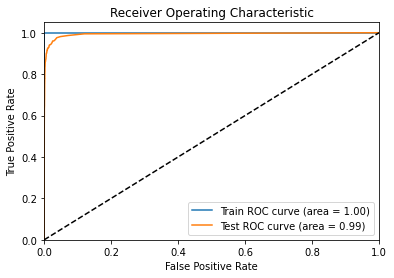

In [40]:
# Plot ROC curves
plt.figure()
plt.plot(fpr_train, tpr_train, label=f'Train ROC curve (area = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test ROC curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

(f) Use SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance in your dataset. Train XGBoost with L1-Penalized Logistic Regression: Using the SMOTE-processed data, train an XGBoost model with L1-penalized logistic regression at each node. Repeat the steps outlined in (e) for this new model. Pay careful attention to the correct way to apply cross validation with SMOTE, as incorrect cross-validation could lead to biased results. Compare the performance metrics of the model trained on SMOTE-processed data with those of the uncompensated case (from Step (e)).

Metrics to compare include:Confusion Matrix
ROC Curve
AUC

Discuss any notable differences between the two approaches.

In [41]:
from imblearn.pipeline import Pipeline 
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

In [42]:
model_smote = xgb.XGBClassifier(
    objective='binary:logistic',
    tree_method='hist',
    enable_categorical=True,
    eval_metric='logloss'
)
pipeline = Pipeline([('smote', SMOTE(random_state=42)), ('model', model_smote)])
param_grid_smote = {'model__reg_alpha': [0, 0.1, 0.5, 1, 5, 10]}
grid_search_smote = GridSearchCV(pipeline, param_grid_smote, cv=5, scoring='roc_auc')
grid_search_smote.fit(X_train, y_train)
best_alpha_smote = grid_search_smote.best_params_['model__reg_alpha']
print(f"Optimal alpha with SMOTE: {best_alpha_smote}")
best_model_smote = xgb.XGBClassifier(
    objective='binary:logistic',
    tree_method='hist',
    enable_categorical=True,
    eval_metric='logloss',
    reg_alpha=best_alpha_smote
)

Optimal alpha with SMOTE: 5


In [43]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
best_model_smote.fit(X_train_resampled, y_train_resampled)

# Evaluate model with SMOTE
y_train_pred_smote = best_model_smote.predict(X_train)
y_test_pred_smote = best_model_smote.predict(X_test)
y_train_prob_smote = best_model_smote.predict_proba(X_train)[:, 1]
y_test_prob_smote = best_model_smote.predict_proba(X_test)[:, 1]

print("\nTraining Metrics (SMOTE):")
print(confusion_matrix(y_train, y_train_pred_smote))
print(classification_report(y_train, y_train_pred_smote))
print(f"AUC: {auc(roc_curve(y_train, y_train_prob_smote)[0], roc_curve(y_train, y_train_prob_smote)[1])}")

print("\nTest Metrics (SMOTE):")
print(confusion_matrix(y_test, y_test_pred_smote))
print(classification_report(y_test, y_test_pred_smote))
print(f"AUC: {auc(roc_curve(y_test, y_test_prob_smote)[0], roc_curve(y_test, y_test_prob_smote)[1])}")


Training Metrics (SMOTE):
[[58996     4]
 [   12   988]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59000
           1       1.00      0.99      0.99      1000

    accuracy                           1.00     60000
   macro avg       1.00      0.99      1.00     60000
weighted avg       1.00      1.00      1.00     60000

AUC: 0.9999451610169491

Test Metrics (SMOTE):
[[15295   330]
 [   45   330]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     15625
           1       0.50      0.88      0.64       375

    accuracy                           0.98     16000
   macro avg       0.75      0.93      0.81     16000
weighted avg       0.99      0.98      0.98     16000

AUC: 0.9904244053333333


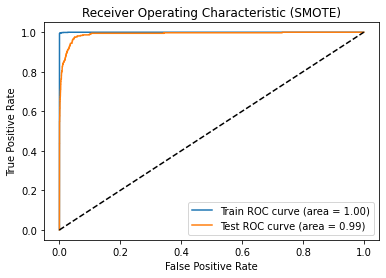

In [44]:
fpr_train_smote, tpr_train_smote, _ = roc_curve(y_train, y_train_prob_smote)
fpr_test_smote, tpr_test_smote, _ = roc_curve(y_test, y_test_prob_smote)
roc_auc_train_smote = auc(fpr_train_smote, tpr_train_smote)
roc_auc_test_smote = auc(fpr_test_smote, tpr_test_smote)
plt.figure()
plt.plot(fpr_train_smote, tpr_train_smote, label=f'Train ROC curve (area = {roc_auc_train_smote:.2f})')
plt.plot(fpr_test_smote, tpr_test_smote, label=f'Test ROC curve (area = {roc_auc_test_smote:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (SMOTE)')
plt.legend(loc="lower right")
plt.show()

In [47]:
from sklearn.model_selection import cross_val_score, KFold
cv_scores_smote = cross_val_score(best_model_smote, X_train, y_train, cv=KFold(n_splits=5), scoring='roc_auc')
cv_error_smote = 1 - np.mean(cv_scores_smote)
test_error_smote = 1 - auc(roc_curve(y_test, y_test_prob_smote)[0], roc_curve(y_test, y_test_prob_smote)[1])
print(f"\nCross-Validation Error (1-AUC) (SMOTE): {cv_error_smote}")
print(f"Test Error (1-AUC) (SMOTE): {test_error_smote}")
print("\nComparison (SMOTE):")
if abs(cv_error_smote - test_error_smote) < 0.05:
    print("Cross-validation and test errors are close, indicating good generalization.")
else:
    print("Cross-validation and test errors differ, potential overfitting or issues with cross-validation.")

# comparison with previous model.
# run the code from the previous answer, and then compare the results from both models.


Cross-Validation Error (1-AUC) (SMOTE): 0.009356100489833485
Test Error (1-AUC) (SMOTE): 0.009575594666666687

Comparison (SMOTE):
Cross-validation and test errors are close, indicating good generalization.


# 2. ISLR 6.6.3

(a) Training RSS: As we increase s from 0, the training RSS will steadily decrease.

When s=0, we have the most constrained model. As 's' increases, we relax the constraint, allowing the model to fit the training data better. Since the model is allowed to fit the data more closely, the training RSS will decrease.

(b) Test RSS: As we increase s from 0, the test RSS will decrease initially, and then eventually start increasing in a U shape.

Small 's': With small 's', the model is highly constrained, leading to underfitting. 
Large 's': As 's' becomes very large, the model approaches the least squares solution, which can overfit the training data.
U-shape: Therefore, the test RSS initially decreases as the model becomes less constrained and then increases as overfitting starts to dominate.

(c) Variance: As we increase s from 0, the variance will steadily decrease.

Small 's': With small 's', the coefficients are heavily shrunk towards zero. This leads to a simpler model with lower variance.
Large 's': As 's' increases, the coefficients are allowed to take on larger values, making the model more complex. More complex models have higher variance, meaning their predictions are more sensitive to the specific training data.

(d) (Squared) Bias: As we increase s from 0, the bias steadily increase.

Small 's': With small 's', the model is highly constrained, leading to underfitting. Underfitting results in high bias, as the model's assumptions are too simplistic to capture the underlying relationships in the data.
Large 's': As 's' increases, the model becomes less constrained and can fit the training data better. This reduces the bias as the model's assumptions better align with the data.
Steadily increase: Therefore, as 's' increases from 0, the bias steadily increases.

(e) Irreducible Error: As we increase s from 0, the irreducible error will remain constant.

Irreducible error is inherent noise in the data. It is the part of the error that cannot be reduced by any model, regardless of its complexity or the method used to fit it.
The parameter 's' in ridge regression affects the model's complexity and fit, but it does not change the inherent noise in the data.

# 3.ISLR 6.6.5

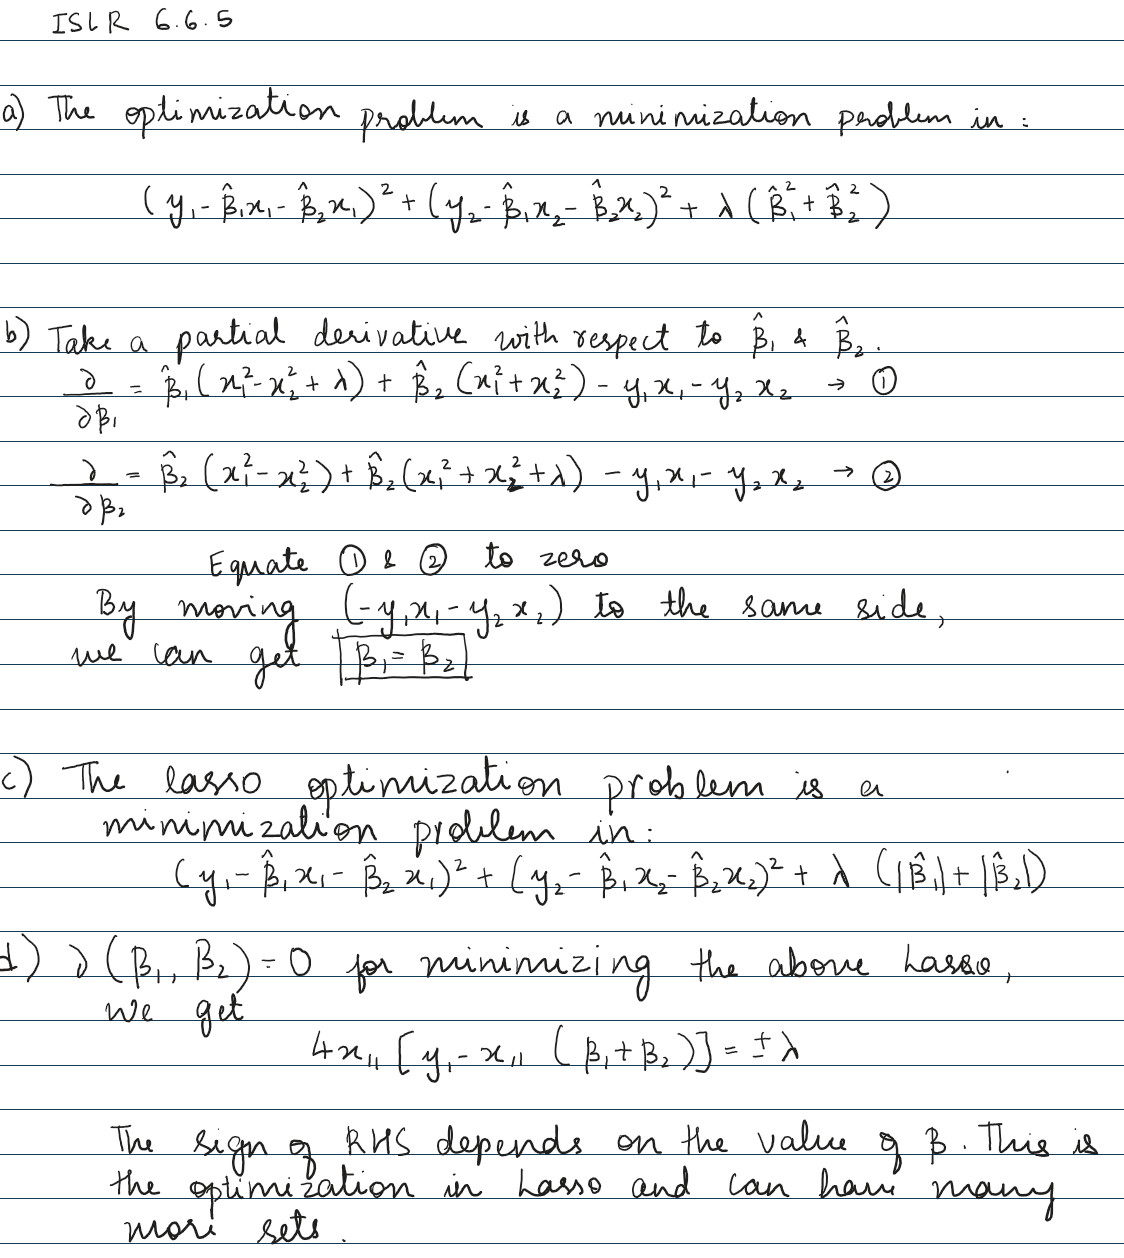

# 4. ISLR 8.4.5

For the majority vote approach, we establish a threshold of 0.5 to classify the data points. If the probability of a data point belonging to the "Red" class exceeds 0.5, it is considered a vote for "Red"; otherwise, it is a vote for "Green". In the given set of probabilities, we observe that 0.55, 0.6, 0.6, 0.65, 0.7, and 0.75 are above the threshold, resulting in six votes for "Red". Conversely, 0.1, 0.15, 0.2, and 0.2 are below or equal to the threshold, yielding four votes for "Green". Since "Red" receives the majority of votes, the final classification under this approach is "Red".

For the average probability approach, we calculate the mean of the provided probabilities. Summing the probabilities (0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75) and dividing by 10, we obtain an average probability of 0.45. This average is then compared to the 0.5 threshold. As 0.45 is less than 0.5, the final classification under this approach is "Green".

In summary, the majority vote approach classifies the data as "Red", while the average probability approach classifies the data as "Green".

# 5. ISLR 9.7.3

a.

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the data for X1, X2, and Y
data_dict = {
    'X1': [3, 2, 4, 1, 2, 4, 4],
    'X2': [4, 2, 4, 4, 1, 3, 1],
    'Y': ['red', 'red', 'red', 'red', 'blue', 'blue', 'blue']
}

# Create a DataFrame to store the data
df = pd.DataFrame(data_dict)

# Display the DataFrame
df

,X1,X2,Y
0,3,4,red
1,2,2,red
2,4,4,red
3,1,4,red
4,2,1,blue
5,4,3,blue
6,4,1,blue


<AxesSubplot:xlabel='X1', ylabel='X2'>

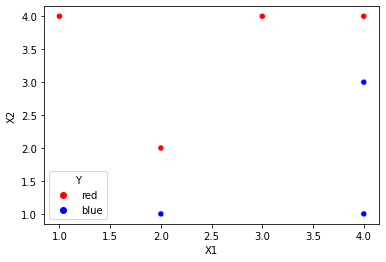

In [67]:
import seaborn as sns
from sklearn import svm

# Define a custom color palette and order based on unique values in the 'Y' column
color_palette = ['red', 'blue']
class_order = df['Y'].unique()

# Create a scatter plot for the data points with specified colors and class order
sns.scatterplot(data=df, x="X1", y="X2", hue="Y", palette=color_palette, hue_order=class_order)

In [68]:
# Convert class labels in the 'Y' column to numerical values
df['Y'] = df['Y'].map({'red': 0, 'blue': 1})

# Separate features and target variable
X_features = df.drop(columns=['Y'])
y_target = df['Y']

# Display the features DataFrame
X_features


,X1,X2
0,3,4
1,2,2
2,4,4
3,1,4
4,2,1
5,4,3
6,4,1


In [69]:
from sklearn.svm import SVC

# Initialize an SVM model with a linear kernel and high regularization parameter
svm_model = SVC(kernel='linear', C=1e3)

# Train the model using the feature and target data
svm_model.fit(X_features, y_target)


SVC(C=1000.0, kernel='linear')

In [70]:
# Generate predictions using the trained SVM model
predictions = svm_model.predict(X_features)

# Display the predicted class labels
predictions

array([0, 0, 0, 0, 1, 1, 1], dtype=int64)

b.

C:\Users\sweet\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
<ipython-input-71-1887e1812f4b>:21: UserWarning: The following kwargs were not used by contour: 'label'
  boundary_lines = ax.contour(x_grid, y_grid, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,


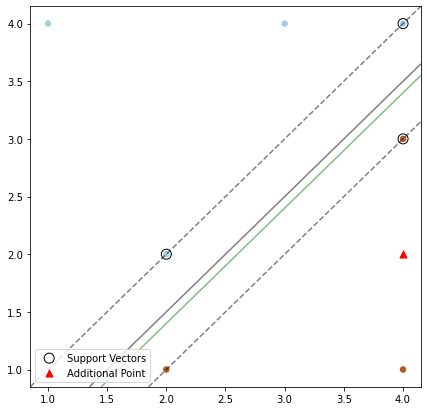

Intercept: [-1.0004096]
Coefficients: [[ 1.9998464 -1.9996928]]


In [71]:
# Create a sample DataFrame for visualization
df_sample = df

# Initialize the plot
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(df_sample.iloc[:, 0], df_sample.iloc[:, 1], 
           c=df_sample.iloc[:, -1], s=30, cmap=plt.cm.Paired)

# Define the plot limits
x_limits = ax.get_xlim()
y_limits = ax.get_ylim()

# Generate a grid to evaluate the model's decision function
x_vals = np.linspace(x_limits[0], x_limits[1], 30)
y_vals = np.linspace(y_limits[0], y_limits[1], 30)
y_grid, x_grid = np.meshgrid(y_vals, x_vals)
grid_points = np.vstack([x_grid.ravel(), y_grid.ravel()]).T

# Calculate decision boundaries
Z = svm_model.decision_function(grid_points).reshape(x_grid.shape)
boundary_lines = ax.contour(x_grid, y_grid, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                            linestyles=['--', '-', '--'], label="Decision Boundary")

# Highlight support vectors
ax.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', label="Support Vectors")

# Add an additional contour line to visualize offset
extra_lines = ax.contour(x_grid, y_grid, Z - 0.2, colors='g', levels=[0], alpha=0.5,
                         linestyles=['-'])

# Plot an additional test point
ax.scatter([4.0], [2.0], color='r', marker='^', s=50, label="Additional Point")

# Display legend and plot
ax.legend()
plt.show()

# Print model parameters
print("Intercept:", svm_model.intercept_)
print("Coefficients:", svm_model.coef_)


c.

In [75]:
beta0 = -5
beta1 = 1
beta2 = 1

print(f"Classification Rule: Classify to Red if {beta0} + {beta1}*X1 + {beta2}*X2 > 0, else Blue.")
print(f"Beta values: beta0={beta0}, beta1={beta1}, beta2={beta2}")

Classification Rule: Classify to Red if -5 + 1*X1 + 1*X2 > 0, else Blue.
Beta values: beta0=-5, beta1=1, beta2=1


d. The dashed line in the visualisation above depicts the maximal marginal hyperplane

e. The points with circles around them are the support vectors.

f. The seventh point is distant from the margin boundaries. If it were positioned near the boundary, it would impact the margin, but its current location means it does not.


g. The solid green line represents a non-optimal hyperplane.

h. The new point, marked as a yellow triangle, introduces a case where the classes are no longer linearly separable.